# Quantum States

## SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.

### 1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [27]:
import numpy as np
def quantumStates(vector, position):
    probability = np.abs(vector[position]) ** 2 / np.linalg.norm(vector) ** 2
    return probability
def ejemplo(): #Ejemplo 4.1.1
    ket = np.array([[-3-1j],[-2j], [1j], [2]])
    for i in range (0, ket.shape[0]):
        position = i
        probability = quantumStates (ket, position)
        print(probability)
ejemplo()
    

[0.52631579]
[0.21052632]
[0.05263158]
[0.21052632]


### 2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [38]:
import numpy as np
def normalize(vector):
    norma = np.linalg.norm(vector)
    normal = vector / norma
    return normal
def transit(vector1, vector2):
    normal1 = normalize(vector1)
    normal2 = normalize(vector2)
    internal_product = np.vdot(normal2, normal1)
    return internal_product
def ejemplo(): #Ejemplo 4.1.7
    vector1 = np.array([1, -1j])
    vector2 = np.array([1j, 1])
    t = transit (vector1, vector2)
    print(np.round(t, 2))           
ejemplo()

-1j


## COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.

### 1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [37]:
import numpy as np
def normalize(vector):
    norma = np.linalg.norm(vector)
    normal = vector / norma
    return normal
def transit(vector1, vector2):
    normal1 = normalize(vector1)
    normal2 = normalize(vector2)
    internal_product = np.vdot(normal2, normal1)
    return internal_product
def ejemplo(): #Ejemplo 4.1.7
    vector1 = np.array([1, -1j])
    vector2 = np.array([1j, 1])
    tr = transit (vector1, vector2)
    t = np.linalg.norm(tr)**2
    print(np.round(t,2))           
ejemplo()

1.0


### 2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [62]:
def isHermitian(matrix): #Ejemplo 4.2.5
    is_hermitian = np.allclose(matrix, matrix.conj().T)
    return is_hermitian
def average(observable, ket):
    bra = np.dot(observable, ket.T)
    a = np.vdot(bra, ket)
    return a.real
def variance(observable, ket, average):
    n = len(observable[0])
    step1 = observable - average * np.eye(n)
    step2 = np.dot(step1, step1)
    step3 = np.dot(step2, ket.T) 
    step4 = np.vdot(ket, step3)
    return step4.real
def ejemplo():
    matrix = np.array([[1, -1j], [1j, 2]])
    ket = np.array([np.sqrt(2)/2, (np.sqrt(2)/2)*1j])
    u = average(matrix, ket)
    v = variance(matrix, ket, u)
    print(isHermitian(matrix))
    print(np.round(u, 2))
    print(np.round(v, 2))
ejemplo()
    

True
2.5
0.25


### 3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.



In [83]:
import numpy as np
def normalize(vector):
    norma = np.linalg.norm(vector)
    normal = vector / norma
    return normal
def eigen(matriz):
    eigenvalues, eigenvectors = np.linalg.eig(observable)
    print("Eigenvalues:", eigenvalues)
    print("\nEigenvectors:", eigenvectors)
    return eigenvectors
    
def ejemplo(): #Ejemplo 4.2.1 - 4.3.2
    observable = np.array([[-1, -1j], [1j, 1]])
    ket = ((np.array([1/2, 1/2]))).T
    ket_normal = normalize(ket)
    eigenvectors = eigen(observable)
    eigenvector1 = eigenvectors[0]
    eigenvector2 = eigenvectors[1]
    p1 = np.round(np.linalg.norm(np.vdot(ket_normal, eigenvector1))**2, 2)
    p2 = np.round(np.linalg.norm(np.vdot(ket_normal, eigenvector2))**2, 2)
    print("probabilities that our state vector will fall into one of the two eigenvectors:", p1, p2)
ejemplo()




Eigenvalues: [-1.41421356+0.j  1.41421356+0.j]

Eigenvectors: [[ 0.92387953+0.j         -0.        -0.38268343j]
 [-0.        -0.38268343j  0.92387953+0.j        ]]
probabilities that our state vector will fall into one of the two eigenvectors: 0.5 0.5


### 4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [82]:
import numpy as np
def final_state(matrix, initial_state):
    final = initial_state
    for i in range(len(matrix)):
        final = np.dot(matrix[i], final)
    return final
def ejemplo():
    matrix=[]
    matrix.append(np.array([[1, 0], [0, 1]]))
    matrix.append(np.array([[0, -1j], [1j, 0]]))
    matrix.append(np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])) 
    f = final_state(matrix, np.array([1,0]))
    print("Estado final:", f)
ejemplo()

Estado final: [0.+0.70710678j 0.-0.70710678j]


## EJEMPLOS

### Exercise 4.3.1

In [87]:
import numpy as np
Sx = (1/np.sqrt(2)) * np.array([[0, 1], [1, 0]])
eigenvalues, eigenvectors = np.linalg.eig(Sx)
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
initial_state = np.array([1, 0]) #Spin up
transition_probabilities = []
probability_distribution = 0
for e in eigenvectors.T:
    transition_probability = np.linalg.norm(np.vdot(e, initial_state))**2
    transition_probabilities.append(np.round(transition_probability, 2))
print("\nProbabilidades de transición por cada vector propio:")
for i, probability in enumerate(transition_probabilities):
    print(f"Probabilidad de transición al vector propio {i+1}: {probability}")
    probability_distribution += probability * eigenvalues[i]
print("\nProbability_distribution", probability_distribution)

Eigenvalues:
[ 0.70710678 -0.70710678]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Probabilidades de transición por cada vector propio:
Probabilidad de transición al vector propio 1: 0.5
Probabilidad de transición al vector propio 2: 0.5

Probability_distribution 0.0


### Exercise 4.3.2

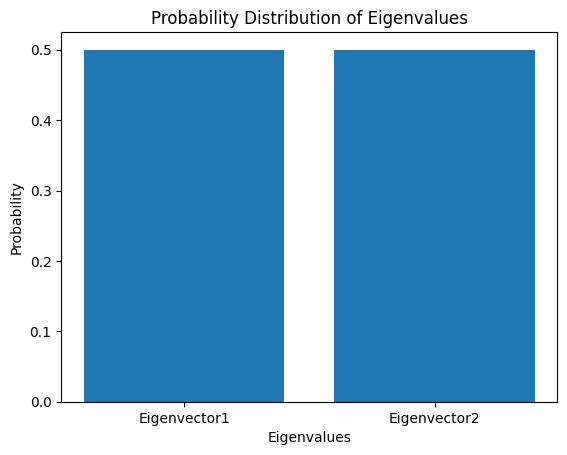

In [98]:
import numpy as np
import matplotlib.pyplot as plt
H = (1/np.sqrt(2)) * np.array([[0, 1], [1, 0]])
eigenvalues, eigenvectors = np.linalg.eig(H)
initial_state = np.array([1, 0]) #Spin up
transition_probabilities = []
for e in eigenvectors.T:
    transition_probability = np.linalg.norm(np.vdot(e, initial_state))**2
    transition_probabilities.append(transition_probability)

probability_distribution = np.sum(transition_probabilities * eigenvalues)
indices = ["Eigenvector1", "Eigenvector2"]
plt.bar(indices, transition_probabilities)
plt.xlabel("Eigenvalues")
plt.ylabel("Probability")
plt.title("Probability Distribution of Eigenvalues")
plt.show()


### Exercise 4.4.1

In [97]:
import numpy as np
def isUnitary(vector):
    is_unitary = np.allclose(np.dot(vector, vector.conj().T), np.eye(2))
    return is_unitary
def ejemplo():
    u1 = np.array([[0, 1], [1, 0]])
    u2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])
    mult = np.dot(u1, u2)
    print("U1:", isUnitary(u1))
    print("U2:", isUnitary(u2))
    print("U1*U2:", isUnitary(mult))
ejemplo()


U1 True
U2 True
U1*U2 True


### Exercise 4.4.2

In [104]:
import numpy as np
mapa = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])
initial_state= np.array([1, 0, 0, 0])
initial_state = np.linalg.matrix_power(mapa, 3) @initial_state
probability_ball = np.abs(initial_state[2])**2
print("El estado del sistema despues de 3 tiempos es: ", initial_state)
print("Probabilidad de encontrar la bola cuántica en el punto 3:", probability_ball)

El estado del sistema despues de 3 tiempos es:  [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la bola cuántica en el punto 3: 0.0
